## Анализ матрицы корреляции произвольных данных.
Это задание не проверяется LMS.

Но выполняя его, вы тренируете и закрепляете навыки расчета и анализа матрицы корреляции на различных исходных данных.

Для этого задания вы можете использовать любой доступный вам набор данных, например, загрузите заинтересовавший вас набор данных с сайта kaggle. 

Что нужно сделать:

создайте Python-ноутбук, загрузите в него данные из csv-файла и преобразуйте в объект DataFrame;
изучите структуру данных и выполните их предобработку;
рассчитайте матрицу корреляции;
визуализируйте результат с применением различных способов.
По каждому пункту задания сделайте выводы и отразите их в своем Python-ноутбуке. В качестве решения задания прикрепите ссылку на ноутбук.

In [1]:
import pandas as pd
import seaborn as sns
import os

In [2]:
root_path = os.getcwd()
dir_path = os.path.join(root_path, "datasets")
filename = "Failed_Bank_Dataset_2.csv"
file_path = os.path.join(dir_path, filename)

In [3]:
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Estimated_Loss,Total_Assets,Total_Deposits
0,First Republic Bank,San Francisco,CA,59017,"JPMorgan Chase Bank, N.A.",2023-05-01,NaN,212638872000,176436706000
1,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,2.400000e+09,110363650000,88612911000
2,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,2023-03-10,1.610000e+10,209026000000,175378000000
3,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,1.633000e+07,65733000,64941000
4,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,7.247000e+06,136566000,133936000
5,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03,4.532800e+07,151808000,143102000
6,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,2020-02-14,2.446500e+07,100879000,95159000
7,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,2019-11-01,2.136000e+06,120574000,111234000
8,Louisa Community Bank,Louisa,KY,58112,Kentucky Farmers Bank Corporation,2019-10-25,4.264000e+06,28163000,25174000
9,Resolute Bank,Maumee,OH,58317,Buckeye State Bank,2019-10-25,1.571000e+06,23292000,22885000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Bank_Name              566 non-null    object 
 1   City                   566 non-null    object 
 2   State                  566 non-null    object 
 3   Cert                   566 non-null    int64  
 4   Acquiring_Institution  566 non-null    object 
 5   Closing_Date           566 non-null    object 
 6   Estimated_Loss         564 non-null    float64
 7   Total_Assets           566 non-null    int64  
 8   Total_Deposits         566 non-null    int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 39.9+ KB


In [6]:
df.describe()

,Cert,Estimated_Loss,Total_Assets,Total_Deposits
count,566.000000,5.640000e+02,5.660000e+02,5.660000e+02
mean,31711.392226,1.620317e+08,2.195364e+09,1.694377e+09
std,16477.485768,8.963129e+08,1.861079e+10,1.364801e+10
min,91.000000,0.000000e+00,3.785000e+06,3.705000e+06
25%,20137.000000,1.531775e+07,9.104525e+07,8.123050e+07
50%,32166.000000,3.835200e+07,2.003650e+08,1.826005e+08
75%,35377.250000,9.316550e+07,4.919775e+08,4.326692e+08
max,59017.000000,1.610000e+10,3.070216e+11,1.882608e+11


In [7]:
df.dropna(inplace = True)
df.reset_index(inplace = True, drop = True)
df

,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Estimated_Loss,Total_Assets,Total_Deposits
0,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,2.400000e+09,110363650000,88612911000
1,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,2023-03-10,1.610000e+10,209026000000,175378000000
2,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,1.633000e+07,65733000,64941000
3,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,7.247000e+06,136566000,133936000
4,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03,4.532800e+07,151808000,143102000
...,...,...,...,...,...,...,...,...,...
559,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2.866730e+08,1765455000,1609501000
560,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,7.690000e+05,9075000,8728000
561,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,8.170000e+05,17438000,16931000
562,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2.670000e+06,90397000,71277000


In [8]:
df.drop_duplicates(inplace=True)
df.reset_index(inplace = True, drop = True)
df

,Bank_Name,City,State,Cert,Acquiring_Institution,Closing_Date,Estimated_Loss,Total_Assets,Total_Deposits
0,Signature Bank,New York,NY,57053,"Flagstar Bank, N.A.",2023-03-12,2.400000e+09,110363650000,88612911000
1,Silicon Valley Bank,Santa Clara,CA,24735,First–Citizens Bank & Trust Company,2023-03-10,1.610000e+10,209026000000,175378000000
2,Almena State Bank,Almena,KS,15426,Equity Bank,2020-10-23,1.633000e+07,65733000,64941000
3,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb",2020-10-16,7.247000e+06,136566000,133936000
4,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.",2020-04-03,4.532800e+07,151808000,143102000
...,...,...,...,...,...,...,...,...,...
559,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB",2001-07-27,2.866730e+08,1765455000,1609501000
560,Malta National Bank,Malta,OH,6629,North Valley Bank,2001-05-03,7.690000e+05,9075000,8728000
561,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,2001-02-02,8.170000e+05,17438000,16931000
562,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,2000-12-14,2.670000e+06,90397000,71277000


In [9]:
df.corr().round(3)

,Cert,Estimated_Loss,Total_Assets,Total_Deposits
Cert,1.000,-0.021,-0.000,-0.001
Estimated_Loss,-0.021,1.000,0.493,0.573
Total_Assets,-0.000,0.493,1.000,0.989
Total_Deposits,-0.001,0.573,0.989,1.000


In [10]:
df.corr().round(3).style.background_gradient(cmap='coolwarm')

,Cert,Estimated_Loss,Total_Assets,Total_Deposits
Cert,1.000000,-0.021000,-0.000000,-0.001000
Estimated_Loss,-0.021000,1.000000,0.493000,0.573000
Total_Assets,-0.000000,0.493000,1.000000,0.989000
Total_Deposits,-0.001000,0.573000,0.989000,1.000000


<AxesSubplot:>

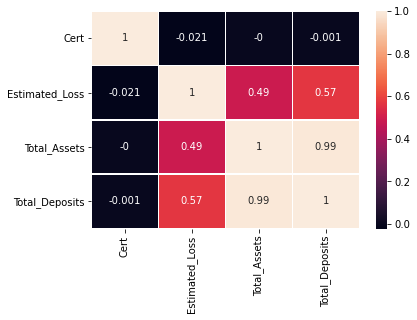

In [11]:
sns.heatmap(df.corr().round(3), annot=True, linewidths=0.5)

Вывод: total_assets почти полностью скоррелирован с total_deposits